In [45]:
import seaborn as sns; sns.set_theme(font_scale=.75)
import pandas as pd
import numpy as np
import pingouin as pt

In [57]:
# Läs in datasetet
file_path = "car_price_dataset.csv"
df = pd.read_csv(file_path, sep = ";")

In [58]:
print("\nKolumnnamn i datasetet:")  
print(df.columns)  


Kolumnnamn i datasetet:
Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')


In [59]:
# Visa de första raderna i datasetet
(df.head())

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [61]:
# Kontrollera datasetets information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [67]:
# Kontrollera om det finns saknade värden
print("Saknade värden per kolumn:")
print(df.isnull().sum())

Saknade värden per kolumn:
Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


In [66]:
# Ta fram beskrivande statistik
display(df.describe())

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [76]:
mean_price = df['Price'].mean()  
median_price = df['Price'].median()  
std_price = df['Price'].std()  

print(f"Medelpris: {mean_price:.2f} USD")  
print(f"Medianpris: {median_price:.2f} USD")  
print(f"Standardavvikelse: {std_price:.2f} USD")  

Medelpris: 8852.96 USD
Medianpris: 8858.50 USD
Standardavvikelse: 3112.60 USD


In [78]:
brand_counts = df['Brand'].value_counts()  
print("Försäljningsfrekvens per märke:")  
print(brand_counts)  

Försäljningsfrekvens per märke:
Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64


In [80]:
average_price_per_brand = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)  
print("Snittpris per bilmärke:")  
print(average_price_per_brand)  

Snittpris per bilmärke:
Brand
Chevrolet     9015.683948
Mercedes      8980.087049
Audi          8929.373796
Volkswagen    8928.377451
Kia           8880.086066
Ford          8852.570611
Toyota        8798.184536
Hyundai       8778.279397
BMW           8704.068068
Honda         8665.596630
Name: Price, dtype: float64


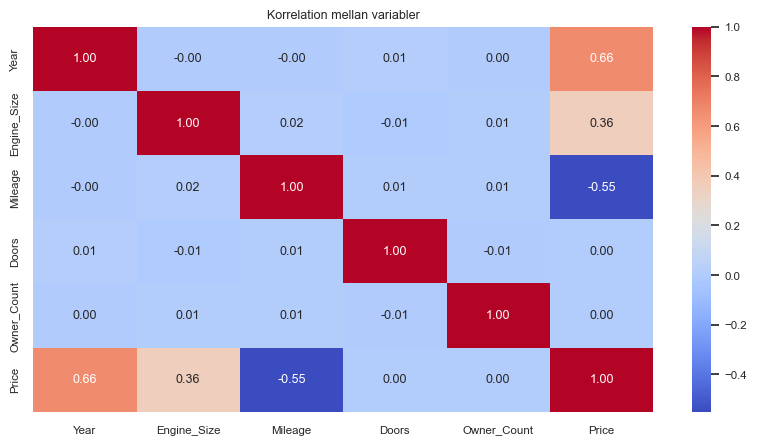

In [71]:
# Visualisera korrelationer  
# Endast numeriska kolumner för korrelationsmatris  
numerical_df = df.select_dtypes(include=['float64', 'int64'])  # Väljer bara numeriska kolumner  
plt.figure(figsize=(10, 5))  
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')  
plt.title("Korrelation mellan variabler")  
plt.show()  

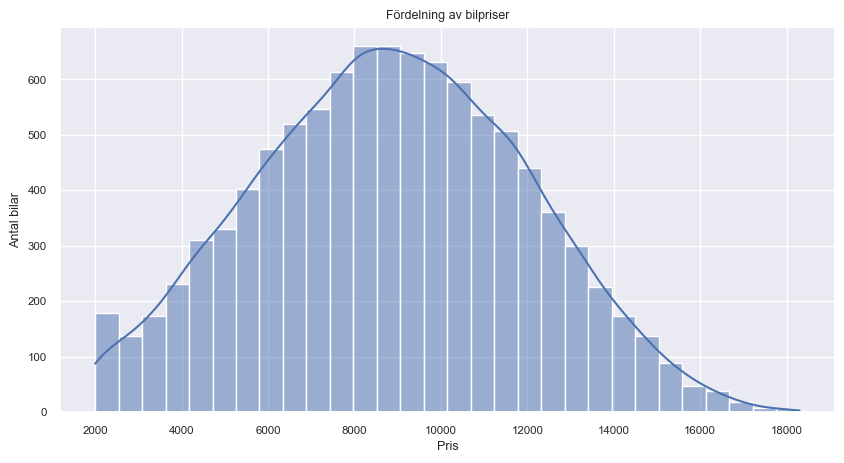

In [65]:

# Fördelning av bilpriser  
plt.figure(figsize=(10, 5))  
sns.histplot(df['Price'], bins=30, kde=True)  
plt.title("Fördelning av bilpriser")  
plt.xlabel("Pris")  
plt.ylabel("Antal bilar")  
plt.show()  

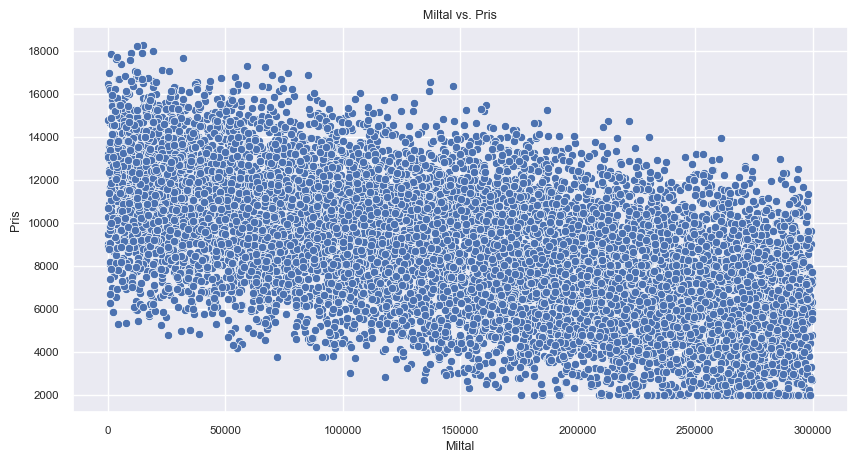

In [69]:

#  Miltal vs. Pris  
plt.figure(figsize=(10, 5))  
sns.scatterplot(x=df['Mileage'], y=df['Price'])  
plt.title("Miltal vs. Pris")  
plt.xlabel("Miltal")  
plt.ylabel("Pris")  
plt.show()  

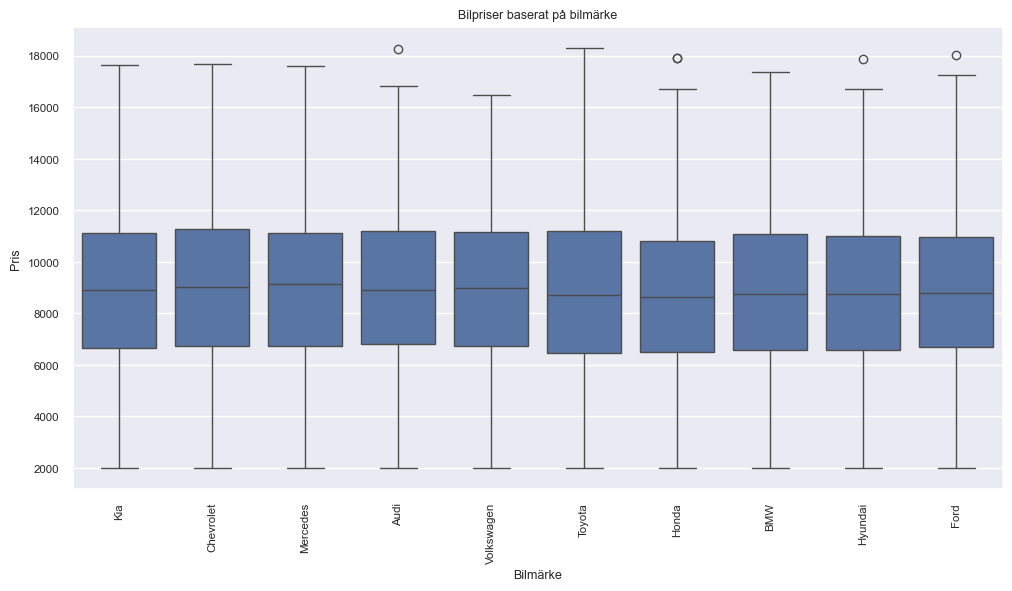

In [70]:
#  Boxplot för bilpriser baserat på bilmärke  
plt.figure(figsize=(12, 6))  
sns.boxplot(x=df['Brand'], y=df['Price'])  # Anpassa kolumnnamn  
plt.xticks(rotation=90)  
plt.title("Bilpriser baserat på bilmärke")  
plt.xlabel("Bilmärke")  
plt.ylabel("Pris")  
plt.show()  

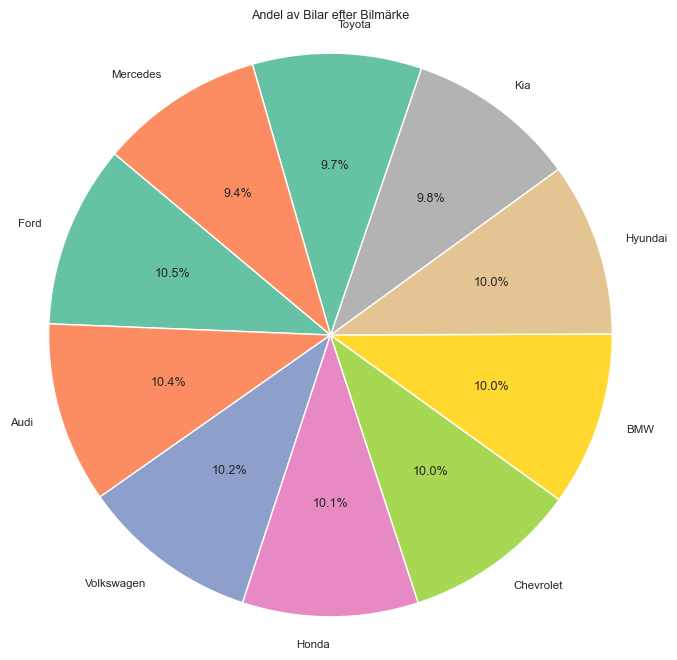

In [73]:
 # Cirkeldiagram för bilmärken  
brand_counts = df['Brand'].value_counts()  
plt.figure(figsize=(8, 8))  
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))  
plt.title("Andel av Bilar efter Bilmärke")  
plt.axis('equal')  # Gör cirkeldiagrammet cirkelrunt  
plt.show() 

In [88]:
average_mileage_per_brand = df.groupby('Brand')['Mileage'].mean()  
print("Medelmilage per bilmärke:")  
print(average_mileage_per_brand)  

Medelmilage per bilmärke:
Brand
Audi          150974.284200
BMW           149980.309309
Chevrolet     146740.873380
Ford          150650.291031
Honda         152424.894945
Hyundai       149836.904523
Kia           149408.309426
Mercedes      145502.817410
Toyota        149176.456701
Volkswagen    147367.759804
Name: Mileage, dtype: float64
